In [124]:
import numpy as np 
import pandas as pd
import warnings

In [125]:
data =pd.read_csv('LoanStats3a.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


In [127]:
data.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
data.dropna(subset=['loan_amnt'], how='all',inplace=True)

In [129]:
data.isnull().sum()   ##Cheking the null Values and clearly observed that nulls are the 

id                                            42535
member_id                                     42535
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      2626
emp_length                                     1112
home_ownership                                    0
annual_inc                                        4
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                           42535
desc        

In [130]:
p=[]
for i in data.columns:
    if (data[i].isnull().sum())>(0.8*data.shape[0]):
        p.append(i)
        data=data.drop(i,axis=1,)
print(p)


['id', 'member_id', 'url', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cre

In [131]:
len(p)   ### Clearly shows that in our data set there are 90 coulmns which has 90% null values so we dropped them

90

In [132]:
data.isnull().sum()            ##Now there are only 54 coulmns remain but still there are some null values in few coulmns      

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13293
purpose                           0
title                            13
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
mths_since_last_delinq        26926
open_acc                         29
pub_rec                     

In [133]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum())

emp_title 2626
emp_length 1112
annual_inc 4
desc 13293
title 13
delinq_2yrs 29
earliest_cr_line 29
inq_last_6mths 29
mths_since_last_delinq 26926
open_acc 29
pub_rec 29
revol_util 90
total_acc 29
last_pymnt_d 83
last_credit_pull_d 4
collections_12_mths_ex_med 145
acc_now_delinq 29
chargeoff_within_12_mths 145
delinq_amnt 29
pub_rec_bankruptcies 1365
tax_liens 105


In [134]:
data.shape

(42535, 54)

In [135]:
data.head(25)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
5,5000.0,5000.0,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
6,7000.0,7000.0,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
7,3000.0,3000.0,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
8,5600.0,5600.0,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9,5375.0,5375.0,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [136]:
data['term']=data['term'].str.replace('[^0-9]','')   #treatment of term column

data['term'].head(5)

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [137]:
data['int_rate']=data['int_rate'].str.replace('[^0-9.]','')    #treatment for int_rate

data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [138]:
data['emp_length']=data['emp_length'].str.replace('[^0-9<+]','')

data['emp_length'].head(5)

0    10+
1     <1
2    10+
3    10+
4      1
Name: emp_length, dtype: object

In [139]:
data['emp_length'].unique()

data['emp_length'].replace(['<1','1','2'],'0-2 years',inplace=True)
data['emp_length'].replace(['3','4','5'],'2-5 years',inplace=True)
data['emp_length'].replace(['6','7','8'],'5-8 years',inplace=True)
data['emp_length'].replace(['9','10+'],'More than 9',inplace=True)
data['emp_length'].value_counts()

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

In [140]:
data['loan_status']=data['loan_status'].replace(('Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'),('Fully Paid', 'Charged Off'))

data['loan_status'].head(5)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
Name: loan_status, dtype: object

In [141]:
data['revol_util']=data['revol_util'].str.replace('[^0-9.]','')

data['revol_util'].head(5)

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [142]:
data['issue_d']=data['issue_d'].replace(('11-Dec','11-Nov','11-Oct','11-Sep','11-Aug','11-Jul','11-Jun','11-May','11-Apr','11-Mar','11-Feb','11-Jan'),2011)
data['issue_d']=data['issue_d'].replace(('10-Dec','10-Nov','10-Oct','10-Sep','10-Aug','10-Jul','10-Jun','10-May','10-Apr','10-Mar','10-Feb','10-Jan'),2010)
data['issue_d']=data['issue_d'].replace(('9-Dec','9-Nov','9-Oct','9-Sep','9-Aug','9-Jul','9-Jun','9-May','9-Apr','9-Mar','9-Feb','9-Jan'),2009)
data['issue_d']=data['issue_d'].replace(('8-Dec','8-Nov','8-Oct','8-Sep','8-Aug','8-Jul','8-Jun','8-May','8-Apr','8-Mar','8-Feb','8-Jan'),2008)
data['issue_d']=data['issue_d'].replace(('7-Dec','7-Nov','7-Oct','7-Sep','7-Aug','7-Jul','7-Jun','7-May','7-Apr','7-Mar','7-Feb','7-Jan'),2007)


In [143]:
data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [144]:
data.head(52)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36,10.65,162.87,B,B2,NaN,More than 9,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.00000,60,15.27,59.83,C,C4,Ryder,0-2 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.00000,36,15.96,84.33,C,C5,NaN,More than 9,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,More than 9,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.00000,60,12.69,67.79,B,B5,University Medical Group,0-2 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
5,5000.0,5000.0,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,2-5 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
6,7000.0,7000.0,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,5-8 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
7,3000.0,3000.0,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,More than 9,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
8,5600.0,5600.0,5600.00000,60,21.28,152.39,F,F2,NaN,2-5 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9,5375.0,5375.0,5350.00000,60,12.69,121.45,B,B5,Starbucks,0-2 years,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [145]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13293
purpose                           0
title                            13
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
mths_since_last_delinq        26926
open_acc                         29
pub_rec                     

In [146]:
data.nunique()

loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9244
term                              2
int_rate                        394
installment                   16459
grade                             7
sub_grade                        35
emp_title                     30658
emp_length                        4
home_ownership                    5
annual_inc                     5597
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
desc                          28963
purpose                          14
title                         21253
zip_code                        837
addr_state                       50
dti                            2894
delinq_2yrs                      12
earliest_cr_line                530
inq_last_6mths                   28
mths_since_last_delinq           95
open_acc                         44
pub_rec                     

In [147]:
data.drop(['emp_title','desc','title','earliest_cr_line','inq_last_6mths','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','policy_code','application_type','hardship_flag'],axis=1,inplace=True)

In [148]:
data.shape

(42535, 38)

In [149]:
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1112
home_ownership                 0
annual_inc                     4
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                   29
mths_since_last_delinq     26926
open_acc                      29
pub_rec                       29
revol_bal                      0
revol_util                    90
total_acc                     29
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

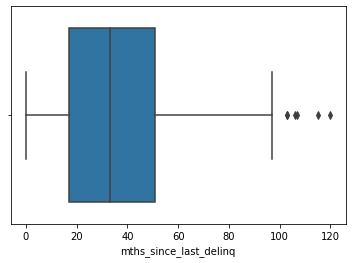

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['mths_since_last_delinq'])
plt.show()

In [151]:
data['mths_since_last_delinq'].median()

33.0

In [152]:
data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median(),inplace=True)
data['mths_since_last_delinq'].isnull().sum()

0

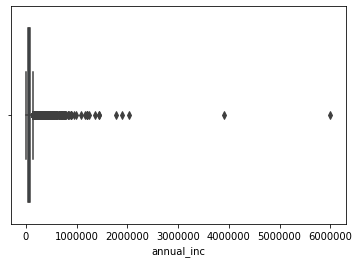

In [153]:
sns.boxplot(data['annual_inc'])
plt.show()

In [154]:
data['annual_inc'].median()

59000.0

In [155]:
data['annual_inc']=data['annual_inc'].fillna(data['annual_inc'].median())
data['annual_inc'].isnull().sum()

0

In [156]:
data['pub_rec'].value_counts()
data['pub_rec'].fillna(0.0,inplace=True)

In [157]:
data['delinq_2yrs'].value_counts()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [158]:
data['emp_length'].value_counts()
data['emp_length']=data['emp_length'].fillna('0-2 years')

In [159]:
data['delinq_2yrs']=data['delinq_2yrs'].fillna(0.0)

In [160]:
data['revol_util'].median()

49.7

In [161]:
data['revol_util'].fillna(data['revol_util'].median(),inplace=True)

In [162]:
data['acc_now_delinq'].value_counts()
data['acc_now_delinq'].fillna(0.0,inplace=True)

In [163]:
data['delinq_amnt'].value_counts()
data['delinq_amnt'].fillna(0.0,inplace=True)

In [164]:
data['pub_rec_bankruptcies'].value_counts()
data['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

In [165]:
data['delinq_2yrs'].value_counts()
data['delinq_2yrs']=data['delinq_2yrs'].fillna(0.0)

In [166]:
data['int_rate']=data['int_rate'].astype('float64')

In [167]:
data['tax_liens'].fillna(0.0,inplace=True)

In [168]:
data.shape

(42535, 38)

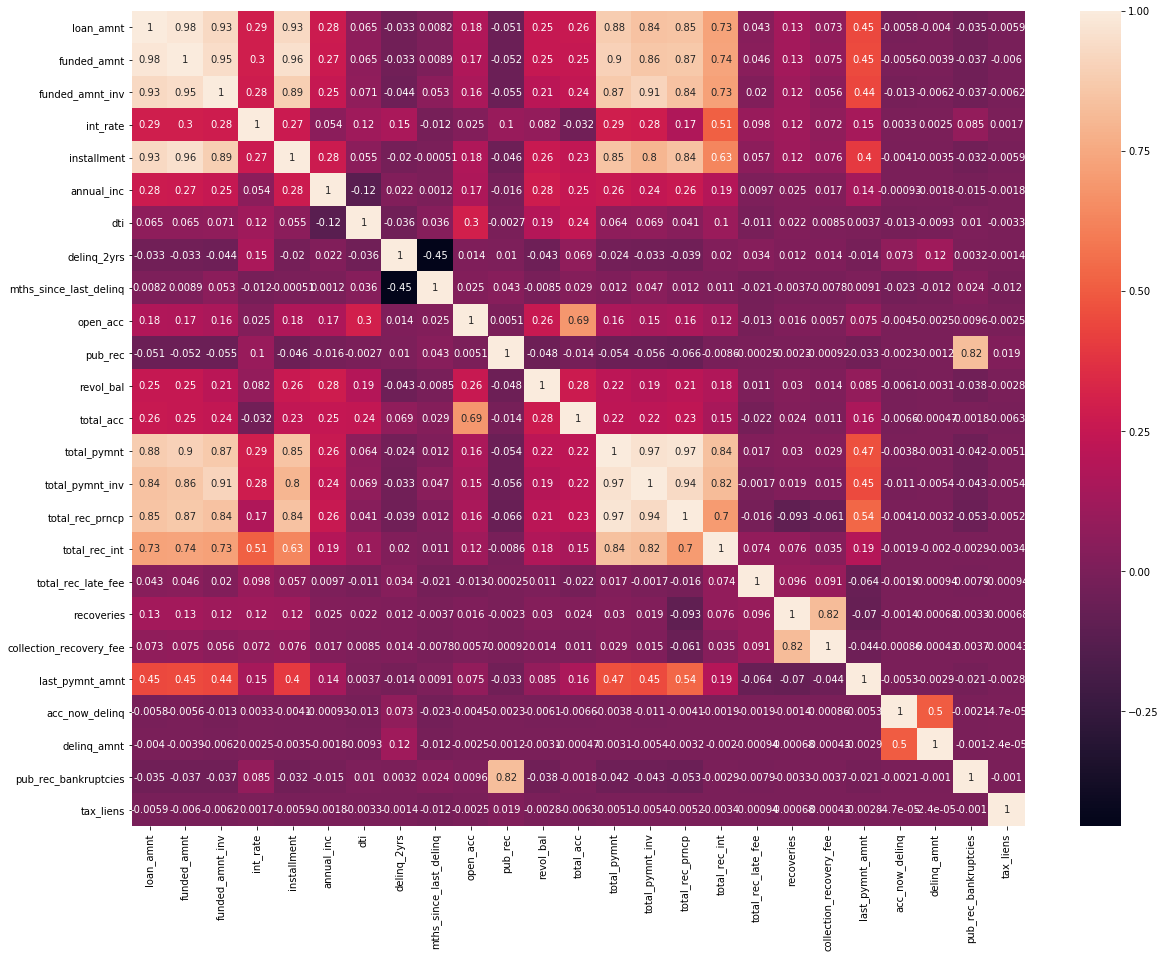

In [169]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

In [170]:
data.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
mths_since_last_delinq      0
open_acc                   29
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                  29
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
acc_now_de

In [171]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [172]:
data.drop(['total_acc','open_acc'],inplace=True,axis=1) ##Droping these two column as heat map shows no correlation with int_rate 

In [173]:
data.shape

(42535, 36)

In [174]:
data.isnull().sum()  ##SO now data set has no null values treated with different method 

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
acc_now_delinq             0
delinq_amnt                0
pub_rec_bankruptcies       0
tax_liens     

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42537
Data columns (total 36 columns):
loan_amnt                  42535 non-null float64
funded_amnt                42535 non-null float64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null float64
installment                42535 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_length                 42535 non-null object
home_ownership             42535 non-null object
annual_inc                 42535 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null object
loan_status                42535 non-null object
purpose                    42535 non-null object
zip_code                   42535 non-null object
addr_state                 42535 non-null object
dti                        42535 non-null float64
de

In [176]:
y=data['int_rate']

x=data.drop(['int_rate','loan_status','zip_code','sub_grade'],axis=1)
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36,162.87,B,More than 9,RENT,24000.0,Verified,...,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60,59.83,C,0-2 years,RENT,30000.0,Source Verified,...,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36,84.33,C,More than 9,RENT,12252.0,Not Verified,...,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0,N
3,10000.0,10000.0,10000.0,36,339.31,C,More than 9,RENT,49200.0,Source Verified,...,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0,N
4,3000.0,3000.0,3000.0,60,67.79,B,0-2 years,RENT,80000.0,Source Verified,...,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0,N


In [177]:
data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [178]:
data['addr_state'].replace(['WA','OR','ID','MT','WY','CO','UT','NV','CA'],'WEST',inplace=True)

In [179]:
data['addr_state'].replace(['ND','MN','WI','MI','OH','IN','IL','MO','KS','NE','SD','IA'],'MID-WEST',inplace=True)

In [180]:
data['addr_state'].replace(['MD','PA','NY','VT','ME','NH','MA','RI','CT','NJ'],'NORTH-EAST',inplace=True)

In [181]:
data['addr_state'].replace(['DE','DC','WV','VA','NC','SC','GA','FL','KL','AL','MS','LA','AR','TN','KY'],'SOUTH-EAST',inplace=True)

In [182]:
data['addr_state'].replace(['TX','OK','NM','AZ'],'SOUTH-WEST',inplace=True)

In [183]:
data['addr_state'].replace(['HI','AK'],'WEST',inplace=True)

In [184]:
data['addr_state'].value_counts()

NORTH-EAST    11539
WEST          10906
SOUTH-EAST     9583
MID-WEST       6137
SOUTH-WEST     4370
Name: addr_state, dtype: int64

In [185]:
data.groupby(['addr_state'])['funded_amnt'].sum().sort_values(ascending=False)

addr_state
NORTH-EAST    125653850.0
WEST          119053775.0
SOUTH-EAST    102177275.0
MID-WEST       65144475.0
SOUTH-WEST     48266775.0
Name: funded_amnt, dtype: float64

In [186]:
numeric=[]

for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
        print(data[i].unique())
        print(i)                        #extracting numeric columns from the data

[ 5000.  2500.  2400. 10000.  3000.  7000.  5600.  5375.  6500. 12000.
  9000.  1000.  3600.  6000.  9200. 20250. 21000. 15000.  4000.  8500.
  4375. 31825. 12400. 10800. 12500.  9600.  4400. 14000. 11000. 25600.
 16000.  7100. 13000. 17500. 17675.  8000.  3500. 16425.  8200. 20975.
  6400. 14400.  7250. 18000. 35000. 11800.  4500. 10500. 15300. 20000.
  6200.  7200.  9500. 18825. 24000.  2100.  5500. 26800. 25000. 19750.
 13650. 28000. 10625.  8850.  6375. 11100.  4200.  8875. 13500. 21600.
  8450. 13475. 22000.  7325.  7750. 13350. 22475.  8400. 13250.  7350.
 11500. 29500.  2000. 11625. 15075.  5300.  8650.  7400. 24250. 26000.
  1500. 19600.  4225. 16500. 15600. 14125. 13200. 12300.  1400.  3200.
 11875.  1800. 23200.  4800.  7300. 10400.  6600. 30000.  4475.  6300.
  8250.  9875. 21500.  7800.  9750. 15550. 17000.  7500.  5800.  8050.
  5400.  4125.  9800. 15700.  9900.  6250. 10200. 23000. 25975. 21250.
 33425.  8125. 18800. 19200. 12875.  2625. 11300.  4100. 18225. 18500.
 16800

In [187]:
data[numeric].groupby(data['grade']).mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,pub_rec,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,8598.261809,8376.229991,8118.220295,7.342708,255.976318,66725.309138,12.043492,0.044584,34.089463,0.014927,...,8123.361122,841.101130,0.551002,21.383188,3.241618,1935.115788,0.000098,0.000000,0.012668,0.000000
B,11047.846880,10793.038179,10218.879847,11.014209,319.429080,67915.047804,13.392900,0.114537,34.130761,0.054726,...,10008.943815,1843.222252,1.046598,61.788047,7.437594,2644.902052,0.000000,0.000000,0.044152,0.000000
C,10872.291190,10652.488558,9802.378579,13.499889,317.827420,68177.588568,13.846410,0.184554,33.867162,0.077460,...,9451.416478,2310.224355,1.881723,106.481146,16.077534,2507.631596,0.000000,0.000000,0.057437,0.000000
D,11848.682680,11647.057846,10795.355016,15.577149,353.858813,68261.487146,13.970959,0.247507,33.458943,0.082281,...,9961.508768,2981.276927,2.115440,139.751026,19.345706,2731.072146,0.000000,0.000000,0.057181,0.000000
E,14703.587213,14160.584856,13044.810309,17.376768,403.603179,75892.024558,14.175636,0.259576,32.805245,0.087507,...,11637.568318,4467.866697,2.709039,236.872641,30.804766,3754.931450,0.000589,1.783441,0.062463,0.000295
F,17150.634128,16534.511914,15112.898833,19.265304,478.282967,83062.405772,14.641453,0.322829,31.694850,0.096080,...,12561.167671,5824.235942,3.654254,455.147503,67.169654,4145.242444,0.000000,0.000000,0.072252,0.000000
G,17091.845703,16683.935547,14607.703878,20.451250,507.923145,93055.818184,15.686172,0.398438,29.892578,0.093750,...,12617.347520,5876.961016,5.512362,469.916973,77.562417,4291.797402,0.001953,0.052734,0.066406,0.000000


In [188]:
data[numeric].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,pub_rec,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,33.0,0.0,...,5000.00,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,33.0,0.0,...,456.46,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,33.0,0.0,...,2400.00,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,35.0,0.0,...,10000.00,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,38.0,0.0,...,3000.00,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0


In [189]:
data[numeric].columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42537
Data columns (total 36 columns):
loan_amnt                  34426 non-null float64
funded_amnt                34426 non-null float64
funded_amnt_inv            34426 non-null float64
term                       42535 non-null object
int_rate                   34426 non-null float64
installment                34426 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_length                 42535 non-null object
home_ownership             42535 non-null object
annual_inc                 34426 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null object
loan_status                42535 non-null object
purpose                    42535 non-null object
zip_code                   42535 non-null object
addr_state                 42535 non-null object
dti                        34426 non-null float64
de

In [191]:
data['revol_util']=data['revol_util'].astype('float64') 

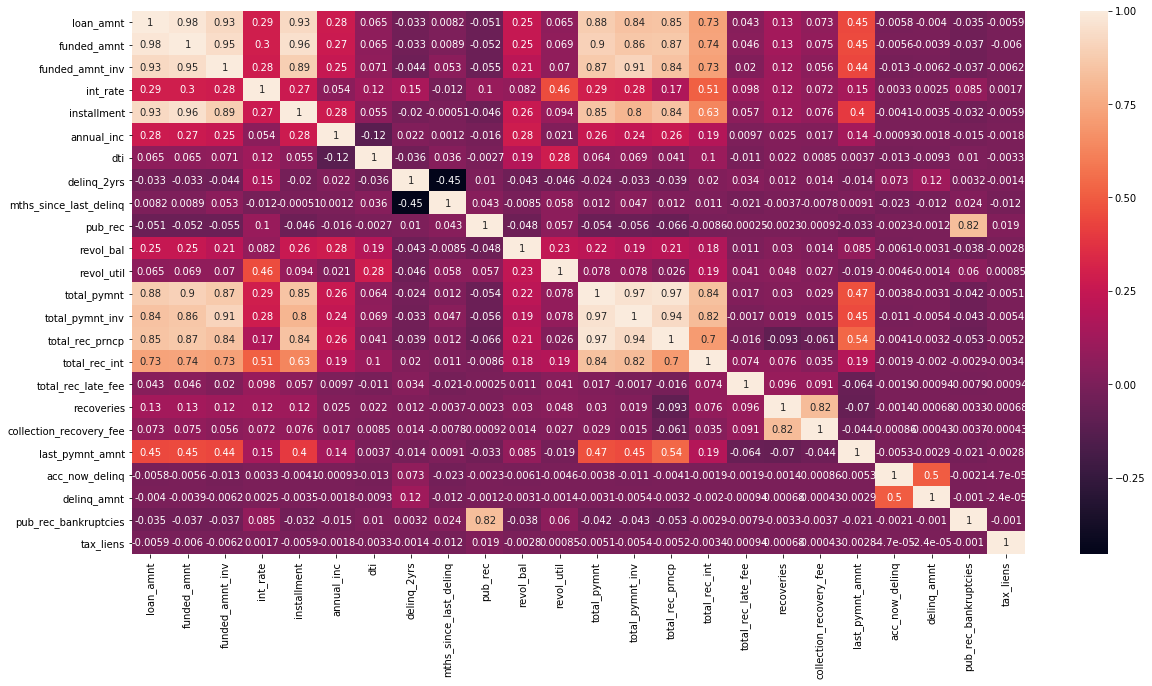

In [192]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot= True)
plt.show()

In [193]:
y=data['int_rate']

x=data.drop(['int_rate','loan_status','zip_code','sub_grade'],axis=1)



x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36,162.87,B,More than 9,RENT,24000.0,Verified,...,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60,59.83,C,0-2 years,RENT,30000.0,Source Verified,...,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36,84.33,C,More than 9,RENT,12252.0,Not Verified,...,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0,N
3,10000.0,10000.0,10000.0,36,339.31,C,More than 9,RENT,49200.0,Source Verified,...,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0,N
4,3000.0,3000.0,3000.0,60,67.79,B,0-2 years,RENT,80000.0,Source Verified,...,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0,N


In [194]:
xcat=[]
for i in x.columns:
    if x[i].dtype=='object':
        xcat.append(i)
        
xcat      

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'addr_state',
 'debt_settlement_flag']

In [195]:
for i in xcat:
    print(i,':   :   :',(data[i].nunique()))

term :   :   : 2
grade :   :   : 7
emp_length :   :   : 4
home_ownership :   :   : 5
verification_status :   :   : 3
issue_d :   :   : 55
purpose :   :   : 14
addr_state :   :   : 5
debt_settlement_flag :   :   : 2


In [196]:
x1=pd.get_dummies(x,columns=[i for i in xcat], prefix = [i for i in xcat],drop_first=True) 

In [197]:
x1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq        0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
acc_now_delinq                0
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_liens                     0
term_60                       0
grade_B                       0
grade_C                       0
grade_D                       0
grade_E                       0
grade_F                       0
grade_G                       0
                             ..
issue_d_

In [198]:
x1.shape

(42535, 111)

# Linear Regression

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [200]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.3,random_state=0)    #splitting in to train and test

In [201]:
sc=StandardScaler()
sc1=StandardScaler()
xtrainscale=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)

xtestscale=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)




In [202]:
lr=LinearRegression()

model=lr.fit(xtrainscale,ytrain)

lrpred=model.predict(xtestscale)



In [203]:
mse=mean_squared_error(ytest,lrpred)

rmse=np.sqrt(mse)

rmse

0.8220597117962668

In [204]:
r2=r2_score(ytest,lrpred)

r2     

0.9504838065582284

In [205]:
lr1=LinearRegression()

model1=lr1.fit(xtrain,ytrain)    #Fitting the model with unscaled data

lrpred1=model1.predict(xtest)
mse1=mean_squared_error(ytest,lrpred1)

rmse1=np.sqrt(mse1)

print(rmse1)
r12=r2_score(ytest,lrpred1)

print(r12)


0.8220597117952319
0.9504838065583531


# Gradient boosting regressor

In [206]:
from sklearn.ensemble import GradientBoostingRegressor

In [207]:
gb= GradientBoostingRegressor(learning_rate=0.1, n_estimators=75,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10)
gb_model=gb.fit(xtrainscale,ytrain)
gbpred=gb_model.predict(xtest)
mse=mean_squared_error(ytest,gbpred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,gbpred)

In [208]:
print(r2)

0.11357309480382849


In [209]:
print(rmse)

3.478173194342373


In [210]:
gb= GradientBoostingRegressor()
gb_model=gb.fit(xtrain,ytrain)
gbpred=gb_model.predict(xtest)
mse=mean_squared_error(ytest,gbpred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,gbpred)

In [211]:
print(r2)

0.928487373405033


In [212]:
print(rmse)

0.987918467204416


In [213]:
xdummy2=pd.get_dummies(x,columns=[i for i in xcat], prefix = [i for i in xcat],drop_first=True) 

In [214]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xdummy2,y,test_size=0.3,random_state=3)

In [215]:
sc1=StandardScaler()
xtrainscale1=pd.DataFrame(sc1.fit_transform(xtrain1),columns=xtrain1.columns)

xtestscale1=pd.DataFrame(sc1.transform(xtest1),columns=xtest1.columns)


In [216]:
pc=PCA(n_components=35)  # 35 components acquire 85% of variance in the data

pca_train=pc.fit_transform(xtrainscale1)

pca_test=pc.transform(xtestscale1)


pc.explained_variance_

np.cumsum(pc.explained_variance_ratio_)

array([0.07262114, 0.09145783, 0.10887504, 0.12549324, 0.14111772,
       0.15613086, 0.17029166, 0.18359292, 0.19633635, 0.20854523,
       0.22046103, 0.23186185, 0.2429982 , 0.25379958, 0.2643994 ,
       0.2749047 , 0.28533494, 0.29557576, 0.30558617, 0.31543711,
       0.32518872, 0.33489761, 0.34450449, 0.35407619, 0.36351305,
       0.37289717, 0.38227418, 0.39161179, 0.40090553, 0.41017266,
       0.41940132, 0.42858081, 0.43775741, 0.44689849, 0.45601156])

In [217]:
lr3=LinearRegression()     #fitting regression model for pca data

lrmodel3=lr3.fit(pca_train,ytrain1)

lrpred3=lrmodel3.predict(pca_test)

rmse3=np.sqrt(mean_squared_error(lrpred3,ytest1))
print(rmse3)

r_sq=r2_score(lrpred3,ytest1)

print(r_sq)      #model performance after applying pca reduces

2.4836068403952667
0.18418501354077144


Text(0.5, 1.0, 'finding the number of components')

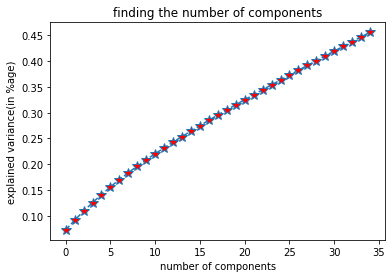

In [218]:
plt.plot(np.cumsum(pc.explained_variance_ratio_),marker='*',linestyle='dashed',markerfacecolor='red',markersize=10)

plt.xlabel('number of components')
plt.ylabel('explained variance(in %age)')
plt.title('finding the number of components')

In [219]:
lr3=LinearRegression()     #fitting regression model for pca data

lrmodel3=lr3.fit(pca_train,ytrain1)

lrpred3=lrmodel3.predict(pca_test)

rmse3=np.sqrt(mean_squared_error(lrpred3,ytest1))
print(rmse3)

r_sq=r2_score(lrpred3,ytest1)

print(r_sq)      #model performance after applying pca reduces

2.4836068403952667
0.18418501354077144
